Rafał Nowak
# Numerical Optimization
## Problem set 1 (20 points)

**Submission deadline**: Tuesday, 29.10.2020

* All submissions should contain single file.<br/>This can be single Jupyter notebook file (with extension `ipynb`) or ZIP archive in case the are some additional files needed.
* It is recommended to write the reports using LaTeX. 
* One can report the answers, comments and results in PDF or notebook file.
* All the source code should be written in Python or Julia.

**Problem 1.1 (5 pts)**

In this problem you are going to solve the system of linear equations $Ax=b$, where $A\in \mathbb R^{n\times n}$, $b\in\mathbb R^n$ are given.

1. Implement the [Gauss elimination algorithm](https://www.wikiwand.com/en/Gaussian_elimination) that solves the system $Ax=b$. 
> `x = solve(A,b)`
2. Test your algorithm with built-in solver (see [`\`](https://docs.julialang.org/en/v1/stdlib/LinearAlgebra/#Base.:\-Tuple{AbstractArray{T,2}%20where%20T,Union{AbstractArray{T,1},%20AbstractArray{T,2}}%20where%20T}) in Julia for example).<br/>
One can perform the tests by taking $b := Ax$ for somehow generated vector (solution) $x\in\mathbb R^n$.
3. Experiment with different kind of matrices $A$: symmetric, (2,3-)diagonal, Hilbert, positive definite, ..., 

In [1]:
import numpy as np

def solve(A,b):
    '''
    Finds the solution to the matrix equation Ax = b for provided A and b
    Input:
    - A; square nxn matrix
    - b; n-dimensional vector
    Returns:
    - x; n-dimensional vector
    '''
    
    M = np.hstack((A,b))
    M = M.astype(np.float32)
    
    #bring matrix to echelon form
    for i in range(0, len(A)):
        for j in range(1, len(A)):
            if j > i:
                M[j] = M[j] - (M[j, i] / M[i, i]) * M[i] 
      
    #get one in the last [n,n] marix entry
    M[-1] = M[-1] / M[A.shape[0] - 1, A.shape[1] - 1]
    
    #go backwards to obtain an n x n Identity        
    for i in range(len(A)-1, -1, -1):
        for j in range(len(A)-2, -1, -1):
            
            #row operations to get zero values on off-diagonals
            if i > j:
                M[j] = M[j] - M[j,i] * M[i] 
                
            #obtaining ones on the diagonals    
            if i == j:
                M[j] = M[j] / M[j,j]
                
    return M[:,-1].reshape(len(b),1)

In [216]:
A = np.array([[2,1,-1],[-3,-1,2],[-2,1,2]])
b = np.array([[8,-11,-3]]).reshape(3,1)

In [217]:
my_solution = solve(A,b)
my_solution

array([[ 2.],
       [ 3.],
       [-1.]], dtype=float32)

In [218]:
solver_solution = np.linalg.solve(A,b)
solver_solution

#the solutions from solver and my functions are identical

array([[ 2.],
       [ 3.],
       [-1.]])

In [219]:
#some more testing
test_1 = np.array([[2,0,0],[0,3,0],[0,0,4]])

sol_1 = solve(test_1, b)
sol_1

array([[ 4.       ],
       [-3.6666667],
       [-0.75     ]], dtype=float32)

In [220]:
solver_solution_diag = np.linalg.solve(test_1,b)
solver_solution_diag

#the solutions from solver and my functions are identical

array([[ 4.        ],
       [-3.66666667],
       [-0.75      ]])

In [221]:
from scipy.linalg import hilbert

test_2 = hilbert(3)

sol_2 = solve(test_2, b)
sol_2

array([[  377.99896],
       [-1859.9946 ],
       [ 1679.995  ]], dtype=float32)

In [222]:
solver_solution_Hilbert = np.linalg.solve(test_2,b)
solver_solution_Hilbert

#the solutions from solver and my functions are identical

array([[  378.],
       [-1860.],
       [ 1680.]])

**Problem 1.2 (5 pts)**

Consider the following linear problem:
```
    maximize     2x+2y+z
    
                 | 1 1 1 |   | x |     | 5 |
    subject to   | 1 1 0 | * | y |  <= | 4 |
                 | 0 0 1 |   | z |     | 4 |
                 
                 x, y, z >= 0
```
* Plot the 3D polytope defined be the constraints. What is the number of vertices?
* Solve the LP.

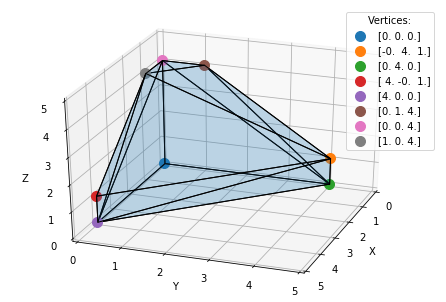

In [2]:
# the code for this question has been developed based on the comments from the following thread on stackoverflow.com:
# https://stackoverflow.com/questions/49098466/plot-3d-convex-closed-regions-in-matplot-lib/49115448

from scipy.spatial import HalfspaceIntersection
from scipy.spatial import ConvexHull
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d as a3
import matplotlib.colors as colors

# define the constraints in the form Ax + b <= 0 and put into [A,b]
halfspaces = np.array([
                    [1., 1., 1., -5.],
                    [1., 1., 0., -4.],
                    [0., 0., 1., -4.],
                    [-1., 0., 0., 0.],
                    [0., -1., 0., 0.],
                    [0., 0., -1., 0.],
                    ])

# provide a feasible point satisfying the above constraints
feasible_point = np.array([1., 1., 1.])

hs = HalfspaceIntersection(halfspaces, feasible_point)
vertices = hs.intersections
hull = ConvexHull(vertices)
faces = hull.simplices

colours = [colors for name, colors in colors.TABLEAU_COLORS.items()]
colours = colours[0:len(vertices)]

# plot the graph
ax = a3.Axes3D(plt.figure())

for s in faces:
    sq = [
        [vertices[s[0], 0], vertices[s[0], 1], vertices[s[0], 2]],
        [vertices[s[1], 0], vertices[s[1], 1], vertices[s[1], 2]],
        [vertices[s[2], 0], vertices[s[2], 1], vertices[s[2], 2]]
    ]

    f = a3.art3d.Poly3DCollection([sq])
    f.set_edgecolor('k')
    f.set_alpha(0.15)
    ax.add_collection3d(f)
    

    
for vertex in range(len(vertices)):
    
    ax.scatter(vertices[vertex][0],
               vertices[vertex][1],
               vertices[vertex][2], 
               c = colours[vertex],
               label = '{}'.format(np.rint(vertices[vertex])),
               s = 100)

ax.azim = 20 # nice viewing angle
ax.set_xlim([0,5])
ax.set_ylim([0,5])
ax.set_zlim([0,5])

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend(title = "Vertices:")

plt.show()

# some unnecessary lines connecting the vertices in the planes of the polytope's sides are present
# but I hope that it is okay and readable nevertheless

In [224]:
print('There are {} vertices in this polytope, each corresponding to a basic feasible solution'.format(len(vertices)))

There are 8 vertices in this polytope, each corresponding to a feasible solution


In [3]:
def objective_function(x, y, z):
    return 2 * x + 2 * y + z

values = []
for vertex in range(len(vertices)):
    values.append(objective_function(vertices[vertex][0], vertices[vertex][1], vertices[vertex][2]))

optimized_value = np.max(values)
indices = np.where(values == optimized_value)
if len(indices[0]) != 1:
    comment = 'non-unique'
    noun = 'solutions'
else:
    comment = 'unique'
    noun = 'solution'
solution = np.rint(vertices[indices])

print("The optimized value for the objective function is {} corresponding to the {} {} {}" \
      .format(optimized_value, comment, noun, solution))

The optimized value for the objective function is 9.0 corresponding to the non-unique solutions [[-0.  4.  1.]
 [ 4. -0.  1.]]


**Problem 1.3 (10 pts)**

Implement the simplex algorithm solving the problem
```
   minimize c^T x
   subject to Ax = b and x >= 0
```
You can assume that the initial *feasible base* (see [BFS](https://www.wikiwand.com/en/Basic_feasible_solution)) $I$ is given.<br/>
Your function should output the optimal value and the minimizer $x$.

In [2]:
data = np.load('simplex_test_data.npz', allow_pickle = True)['data'].item()

In [7]:
def simplex_method(I, c, A, b):
    '''
    Function implementing a simplex algorith to solve a LPP defined by:
    - c: the objective function to be minimized
    - A and b: matrix and vector forming a set of constraints so that Ax = b
    - I: a list of integers indicating column indices which form the initial basis
        
    Outputs a tuple containing:
    - v: the minimized value of the objective function
    - x: np.array with the solution to the LP
    '''
    card = len(I) # cardinality of set I
    x = np.zeros(A.shape[1])
    Ab = np.hstack((A, b.reshape(len(b), 1)))    
    I_bar = [i for i in range(A.shape[1]) if i not in I] 
        
    while True:
        B = A[:,I]
        B_inverse = np.linalg.inv(B) 
        
        B_inverse_Ab = B_inverse @ Ab
        
        # find c_b and c_n   
        c_b = c[I]
        c_n = c[I_bar]
        
        # get B_inv_N from B_inv_Ab
        B_inverse_N = B_inverse_Ab[:,I_bar]
        
        # r has the same length as I_bar!
        r = (c_n -  c_b.T @ B_inverse_N)
        
        # condition for breaking the loop    
        if np.all(r >= 0):
            x = np.zeros(A.shape[1])
            x[I] = B_inverse_Ab[:,-1] #solution to the LP
            val = c.T @ x #calculate the minimized value
            return (val, x)
        
        # get index of the most negative r element
        h_index = np.argmin(r)
        # column number under that index in I_bar going into I
        column_in = I_bar[h_index]
        # get ratios of x_b and column going in
        # ratios has the same length as I!
        ratios = B_inverse_Ab[:, -1] / B_inverse_Ab[:, column_in]
        # want smallest positive ratio - replace negatives with a very big number
        v_index = np.where(ratios > 0, ratios, 10000).argmin()
        # column number under that v_index in I going into I_bar
        column_out = I[v_index]
        # swap columns
        I[v_index], I_bar[h_index] = column_in, column_out
            
        '''
            x= np.zeros(A.shape[1])
            x[I] = Ab[:-1, -1]
            
            invB_Ae = np.zeros(A.shape[1])
            invB_Ae[I] = Ab[:-1, h_index]
            
            e = np.array([0 if i != h_index else 1 for i in range(len(x))])
            
            y = x - smallest_ratio * invB_Ae + smallest_ratio * e
                                    
            I_new = np.nonzero(y)[0] # non-zero elements of calculated y become new temporary set I_new
            
            if len(I_new) > len(I):
                x = np.zeros(A.shape[1])
            
                x[I] = B_inverse_Ab[:,-1] #solution to the LP
        
                v = c.T @ x #calculate the minimized value
            
                return (v, x)
            else:
                I = I_new
            I_bar = [i for i in range(A.shape[1]) if i not in I]
        '''


In [8]:
for i in range(1,41,1):
    print("LPP number:", i)
    print("Model minimum:", data[i]['f'])
    print("My minimum:", simplex_method(data[i]['I'],data[i]['c'],data[i]['A'],data[i]['b'])[0])

LPP number: 1
Model minimum: 0.41710192354023123
My minimum: 0.41710192354023123
LPP number: 2
Model minimum: -0.6436277850837772
My minimum: -0.6436277850837775
LPP number: 3
Model minimum: 0.3270338111619291
My minimum: 0.32703381116192887
LPP number: 4
Model minimum: 2.0440084858465752
My minimum: 2.0440084858465775
LPP number: 5
Model minimum: 1.379704136953148
My minimum: 1.3797041369531482
LPP number: 6
Model minimum: -2.1199414044125597
My minimum: -2.1199414044125606
LPP number: 7
Model minimum: 1.2207635097223068
My minimum: 1.2207635097223068
LPP number: 8
Model minimum: 9.980303846991188
My minimum: 9.980303846991188
LPP number: 9
Model minimum: -2.310331801139286
My minimum: -2.3103318011392853
LPP number: 10
Model minimum: -0.6325118029369357
My minimum: -0.6325118029369358
LPP number: 11
Model minimum: -8.940436961832823
My minimum: -8.940436961832821
LPP number: 12
Model minimum: -0.6249772175328356
My minimum: -0.6249772175328346
LPP number: 13
Model minimum: -14.064488